In [1]:
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x:'%.4f'%x)
pd.set_option('display.max_rows', 300)


df = pd.read_csv('renewable.csv', low_memory=False)
df


,country_or_area,ISO,commodity_transaction,year,category,new_unit,new_quantity,renewable,non_renewable,difference,%_renewable,%_non_renewable
0,Afghanistan,AFG,Electricity - Gross production,1994,total_electricity,TWh,0.6870,0.4720,0.2150,0.0000,68.7045,31.2955
1,Afghanistan,AFG,Electricity - Gross production,1995,total_electricity,TWh,0.6750,0.4660,0.2090,0.0000,69.0370,30.9630
2,Afghanistan,AFG,Electricity - Gross production,1996,total_electricity,TWh,0.6750,0.4750,0.2000,0.0000,70.3704,29.6296
3,Afghanistan,AFG,Electricity - Gross production,1997,total_electricity,TWh,0.6700,0.4850,0.1850,0.0000,72.3881,27.6119
4,Afghanistan,AFG,Electricity - Gross production,1998,total_electricity,TWh,0.6650,0.4950,0.1700,0.0000,74.4361,25.5639
...,...,...,...,...,...,...,...,...,...,...,...,...
4690,Zimbabwe,ZWE,Electricity - Gross production,2010,total_electricity,TWh,8.6029,5.7628,2.8401,-0.0000,66.9867,33.0133
4691,Zimbabwe,ZWE,Electricity - Gross production,2011,total_electricity,TWh,9.1772,5.2018,3.9754,-0.0000,56.6818,43.3182
4692,Zimbabwe,ZWE,Electricity - Gross production,2012,total_electricity,TWh,9.1486,5.3873,3.7613,0.0000,58.8866,41.1134
4693,Zimbabwe,ZWE,Electricity - Gross production,2013,total_electricity,TWh,9.4988,4.9818,4.5170,-0.0000,52.4466,47.5534


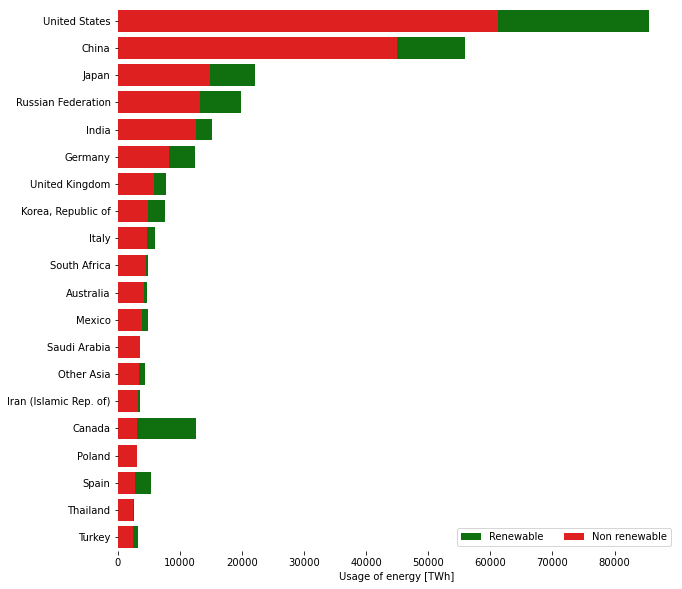

In [22]:
#przygotowanie danych 
df = df.groupby('country_or_area').agg({'new_quantity':'sum', 'non_renewable':'sum'}).reset_index()
df = df.sort_values('non_renewable', ascending=False)
ranking_of_countires = df['country_or_area']
# ranking 50 pierwszych krajów
df50 = df[:20]
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x="new_quantity", y="country_or_area", data=df50,
            label="Renewable", color="g")
sns.barplot(x="non_renewable", y="country_or_area", data=df50,
            label="Non renewable", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Usage of energy [TWh]")
sns.despine(left=True, bottom=True)

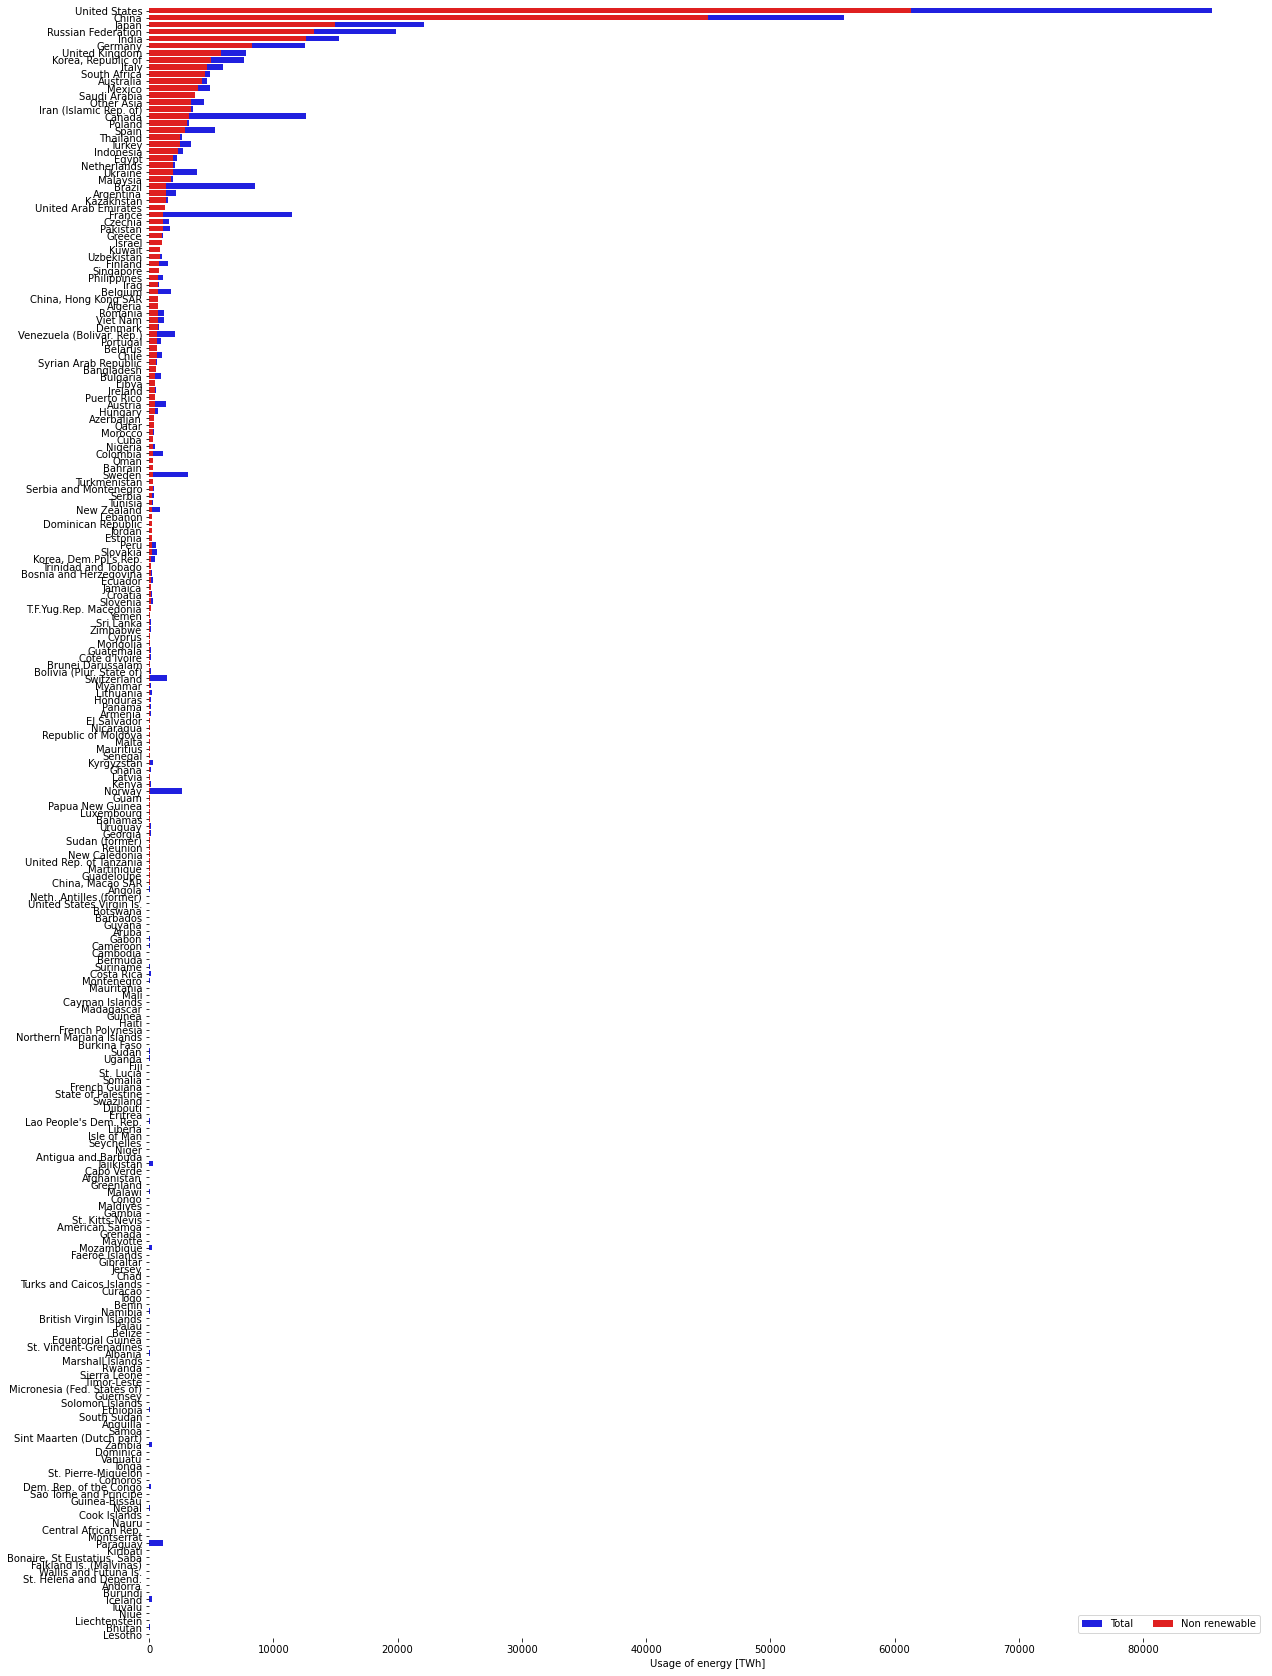

In [3]:
# # Ranking wszystkich krajów
# f, ax = plt.subplots(figsize=(20, 30))
# sns.barplot(x="new_quantity", y="country_or_area", data=df,
#             label="Total", color="b")
# sns.barplot(x="non_renewable", y="country_or_area", data=df,
#             label="Non renewable", color="r")

# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set( ylabel="",
#        xlabel="Usage of energy [TWh]")
# sns.despine(left=True, bottom=True)

In [15]:
#ranking wszystkich krajów pod konterm produkcji energii ze zrodel nieodnawialnych
df['rank'] = df['non_renewable'].rank(method='dense', ascending=False)
ranking_krajow = df[['rank','country_or_area']]
ranking_krajow.set_index('rank', inplace = True)
ranking_krajow

,country_or_area
rank,
1.0000,United States
2.0000,China
3.0000,Japan
4.0000,Russian Federation
5.0000,India
6.0000,Germany
7.0000,United Kingdom
8.0000,"Korea, Republic of"
9.0000,Italy
